In [1]:
# Developer: Ayush Oturkar
# netid: ao586
# Task: Data read, Preprocessing and facets

In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
import re
import seaborn as sns
from matplotlib.gridspec import GridSpec
import os
import numpy as np

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

# Unzip and load the data

In [3]:
# Open the zip file for reading
with zipfile.ZipFile("../Data/corona-out-3.zip", "r") as zip_file:
    # Extract all the files in the zip file to the current directory
    zip_file.extractall(path="../Data/")
    
with zipfile.ZipFile("../Data/corona-out-2.zip", "r") as zip_file:
    # Extract all the files in the zip file to the current directory
    zip_file.extractall(path="../Data/")

# Read the data from Data folder
twitterdf1 = pd.read_json("../Data/corona-out-3", lines=True)
twitterdf2 = pd.read_json("../Data/corona-out-2", lines=True)
twitterdf2 = twitterdf2[list(twitterdf1.columns)]
twitterdf = twitterdf1.append(twitterdf2)

# Data PreProcessing

In [15]:
print(f"Min date-time of tweet is {twitterdf['created_at'].min()}")
print(f"Max date-time of tweet is {twitterdf['created_at'].max()}")

Min date-time of tweet is 2020-04-12 18:27:25+00:00
Max date-time of tweet is 2020-04-25 14:48:38+00:00


In [16]:
twitterdf.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_in_countries
0,2020-04-25 12:21:41+00:00,1254022770679320576,1254022770679320576,"É isto, ou vou morrer sem ar ou com o corona h...","[0, 44]","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 804046791348015107, 'id_str': '80404679...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1254022759824461824, 'id_str...",False,False,0.0,low,pt,2020-04-25 12:21:41.803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-25 12:21:41+00:00,1254022770746372096,1254022770746372096,Schöne Runde mit dem Rennrad ✌️\n#sport #coron...,"[0, 46]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 2242948745, 'id_str': '2242948745', 'na...",None,None,"{'id': '6c741a421f6c33ff', 'url': 'https://api...",NaN,False,0,0,0,0,"{'hashtags': [{'text': 'sport', 'indices': [32...","{'media': [{'id': 1254022763834155008, 'id_str...",False,False,0.0,low,de,2020-04-25 12:21:41.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-25 12:21:42+00:00,1254022772558368768,1254022772558368768,RT @BJP4India: India’s war with Corona is ongo...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 908326492718764034, 'id_str': '90832649...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,en,2020-04-25 12:21:42.251,{'created_at': 'Sat Apr 25 07:30:12 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-25 12:21:42+00:00,1254022772575043586,1254022772575043584,Was sollen 150 Euro Computerzuschuss bringen? ...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,NaN,None,"{'id': 2929344220, 'id_str': '2929344220', 'na...",None,None,None,NaN,True,0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,False,False,NaN,low,de,2020-04-25 12:21:42.255,NaN,1.254016e+18,1.254016e+18,{'created_at': 'Sat Apr 25 11:56:31 +0000 2020...,"{'url': 'https://t.co/xn4jgGqfoY', 'expanded':...",{'full_text': 'Was sollen 150 Euro Computerzus...,NaN
4,2020-04-25 12:21:42+00:00,1254022772877131777,1254022772877131776,RT @schrodingerk42: @ozkan_yalim @DurmusYillma...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 1206650133976408064, 'id_str': '1206650...",None,None,None,NaN,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,tr,2020-04-25 12:21:42.327,{'created_at': 'Tue Apr 21 12:34:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
twitterdf.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str
count,1.204340e+05,1.204340e+05,1.613800e+04,1.613800e+04,1.758900e+04,1.758900e+04,0.0,120434.0,120434.0,120434.0,120434.0,30882.000000,1.914200e+04,1.914200e+04
mean,1.253329e+18,1.253329e+18,1.252841e+18,1.252841e+18,3.889526e+17,3.889526e+17,NaN,0.0,0.0,0.0,0.0,0.030471,1.251786e+18,1.251786e+18
std,1.672105e+15,1.672105e+15,8.415687e+15,8.415687e+15,5.164451e+17,5.164451e+17,NaN,0.0,0.0,0.0,0.0,0.171882,1.925856e+16,1.925856e+16
min,1.249404e+18,1.249404e+18,8.218186e+17,8.218186e+17,3.987000e+03,3.987000e+03,NaN,0.0,0.0,0.0,0.0,0.000000,3.395442e+17,3.395442e+17
25%,1.254027e+18,1.254027e+18,1.253743e+18,1.253743e+18,1.454086e+08,1.454086e+08,NaN,0.0,0.0,0.0,0.0,0.000000,1.252928e+18,1.252928e+18
50%,1.254039e+18,1.254039e+18,1.254018e+18,1.254018e+18,1.857758e+09,1.857758e+09,NaN,0.0,0.0,0.0,0.0,0.000000,1.253868e+18,1.253868e+18
75%,1.254049e+18,1.254049e+18,1.254038e+18,1.254038e+18,9.751277e+17,9.751277e+17,NaN,0.0,0.0,0.0,0.0,0.000000,1.254012e+18,1.254012e+18
max,1.254060e+18,1.254060e+18,1.254060e+18,1.254060e+18,1.254056e+18,1.254056e+18,NaN,0.0,0.0,0.0,0.0,1.000000,1.254059e+18,1.254059e+18


In [18]:
# 1. User related columns

# Print the number of unique users
twitterdf["user_id"] = twitterdf["user"].apply(lambda x: x["id"])
# twitterdf['user'] = twitterdf['user'].astype(str)

num_users = len(twitterdf["user_id"].unique())
print("Number of unique users:", num_users)
print(f"{' '*15}***{' '*15}")
print("\n")

# Fetch user name
twitterdf["user_name"] = twitterdf["user"].apply(lambda x: x["name"])

# Print the number of tweets
num_tweets = len(twitterdf)
print("Number of tweets:", num_tweets)
print(f"{' '*15}***{' '*15}")
print("\n")

# Fetching total twitter verified users
twitterdf["verified_user"] = twitterdf["user"].apply(lambda x: x["verified"])
twitterdf["verified_user"] = twitterdf["verified_user"].apply(lambda x: 1 if x else 0)

# Print the number of unique users
print(
    "Total Twitter Verified users:",
    twitterdf.drop_duplicates(subset=["user_id"], keep="first")["verified_user"].sum(),
)
print(f"{' '*15}***{' '*15}")
print("\n")

# Fetching the user location
twitterdf["User_location"] = twitterdf["user"].apply(lambda x: x["location"])

# User followers
twitterdf["user_followers_count"] = twitterdf["user"].apply(
    lambda x: x["followers_count"]
)


# 2. Domain related
# Print the top 5 domains in the 'source' column
domains = twitterdf["source"].str.extract(r'<a href=".*?">(.*?)</a>', expand=False)
print('Top 5 domains in the "source" column:')
print(domains.value_counts().head())
print(f"{' '*15}***{' '*15}")
print("\n")

# 3. Hashtag related
# Print the top 5 most common hashtags
hashtags = twitterdf["entities"].apply(
    lambda x: [tag["text"].lower() for tag in x["hashtags"]]
)
hashtags = hashtags.explode()
print("Top 5 most common hashtags:")
print(hashtags.value_counts().head())
print(f"{' '*15}***{' '*15}")

Number of unique users: 95654
               ***               


Number of tweets: 120434
               ***               


Total Twitter Verified users: 1056
               ***               


Top 5 domains in the "source" column:
Twitter for Android    62337
Twitter for iPhone     28580
Twitter Web App        19713
Twitter for iPad        2549
Twitter Web Client      1493
Name: source, dtype: int64
               ***               


Top 5 most common hashtags:
corona         6950
25aprile       1557
mattarella     1507
coronavirus    1458
covid19        1407
Name: entities, dtype: int64
               ***               


# Data Summary - EDA

## 1. Twitter Users Characteristics

### i) Twitter Verified Users check

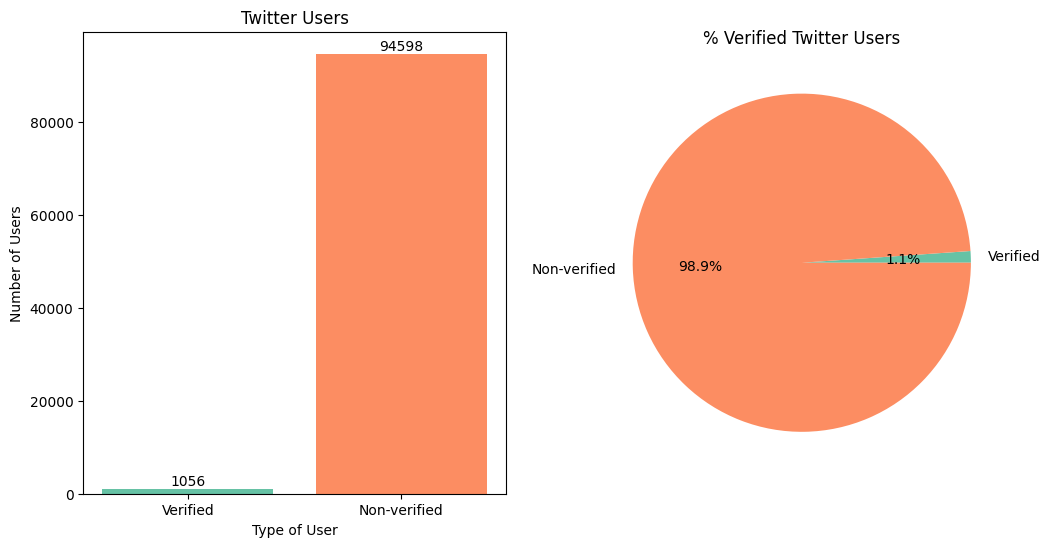

In [19]:
# Define a color palette with the number of colors matching the number of values
palette = sns.color_palette("Set2", n_colors=3)

# Create figure and axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

num_verified = twitterdf.drop_duplicates(subset=["user_id"], keep="first")[
    "verified_user"
].sum()
num_nonverified = num_users - num_verified

# Plot bar chart
ax1.bar(["Verified", "Non-verified"], [num_verified, num_nonverified], color=palette)
ax1.set_title("Twitter Users")
ax1.set_xlabel("Type of User")
ax1.set_ylabel("Number of Users")

# Add data labels to bar chart
for rect in ax1.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax1.text(x, y, f"{y:.0f}", ha="center", va="bottom")

# Plot pie chart
types = ["Verified", "Non-verified"]
counts = [num_verified, num_nonverified]
ax2.pie(counts, labels=types, colors=palette, autopct="%1.1f%%")
ax2.set_title("% Verified Twitter Users")

# Show plot
plt.show()

### ii) Top 5 twitter user locations

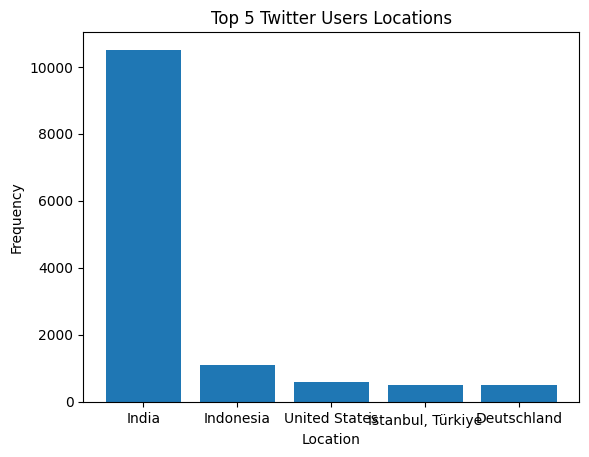

In [20]:
# Fetching the user location
twitterdf["User_location"] = twitterdf["user"].apply(lambda x: x["location"])
# twitterdf['User_location'] = np.where(twitterdf['User_location'].str.lower().contains("india"), "India", twitterdf['User_location'])
twitterdf["User_location"] = np.where(
    twitterdf["User_location"].str.lower().str.contains("india"),
    "India",
    twitterdf["User_location"],
)

# Get the top 5 locations where maximum tweets are being made
top_locations = twitterdf["User_location"].value_counts().head()

# Plot a bar chart of the top 5 locations
plt.bar(top_locations.index, top_locations.values)
plt.title("Top 5 Twitter Users Locations")
plt.xlabel("Location")
plt.ylabel("Frequency")
plt.show()

### iii) Top 5 Followed Twitter Users

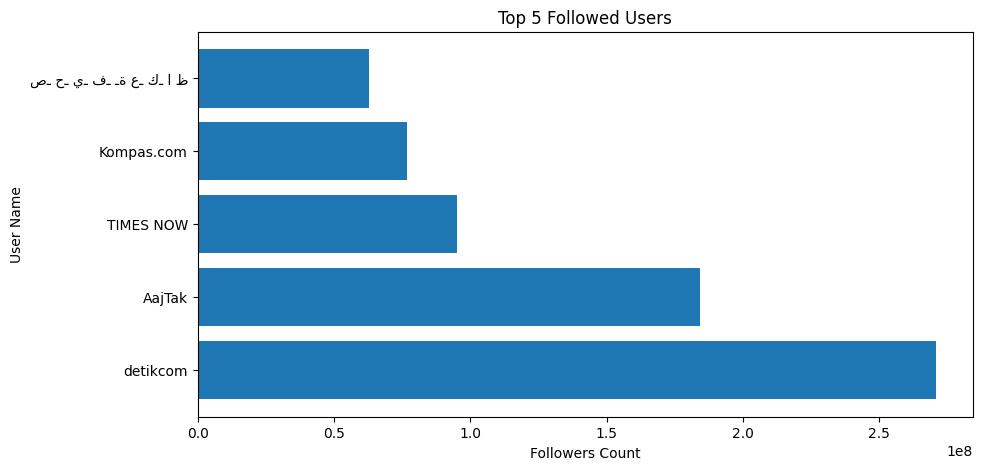

In [21]:
# Group tweets by user and sum the followers count
user_followers = twitterdf.groupby("user_name")["user_followers_count"].sum()

# Sort the series in descending order and select the top 5
top_users = user_followers.sort_values(ascending=False).head(5)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(top_users.index, top_users.values)
ax.set_title("Top 5 Followed Users")
ax.set_xlabel("Followers Count")
ax.set_ylabel("User Name")

plt.show()

## 2. Tweets Related Characteristics

### i) Tweet Types

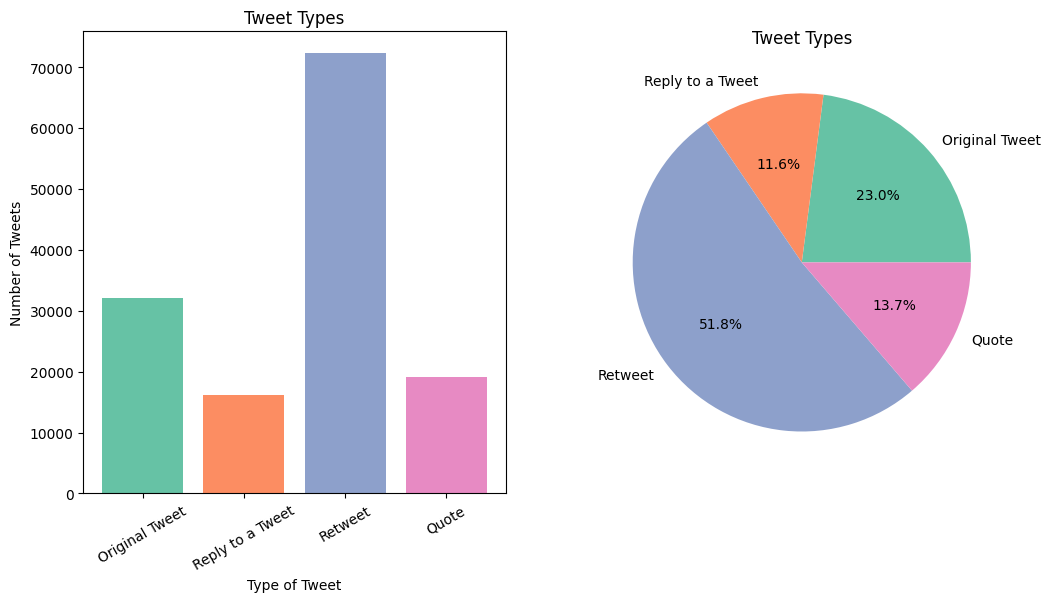

In [22]:
# Get data
is_reply = twitterdf["in_reply_to_status_id"].notna()
num_original_standalone = (
    ~twitterdf["text"].str.startswith("RT ")
).sum() - is_reply.sum()
num_original_reply = is_reply.sum()
num_retweets = twitterdf["retweeted_status"].notna().sum()
num_quotes = twitterdf["quoted_status"].notna().sum()

# Create grid
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, figure=fig)

# Define a color palette with the number of colors matching the number of values
palette = sns.color_palette("Set2", n_colors=4)

# Plot bar chart
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(
    ["Original Tweet", "Reply to a Tweet", "Retweet", "Quote"],
    [num_original_standalone, num_original_reply, num_retweets, num_quotes],
    color=palette,
)
ax1.set_title("Tweet Types")
ax1.set_xlabel("Type of Tweet")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)
ax1.set_ylabel("Number of Tweets")


# Plot pie chart
ax2 = fig.add_subplot(gs[0, 1])
types = ["Original Tweet", "Reply to a Tweet", "Retweet", "Quote"]
counts = [num_original_standalone, num_original_reply, num_retweets, num_quotes]
ax2.pie(counts, labels=types, colors=palette, autopct="%1.1f%%")
ax2.set_title("Tweet Types")

# Show plot
plt.show()

### ii) Top 5 Tweet Source Domains

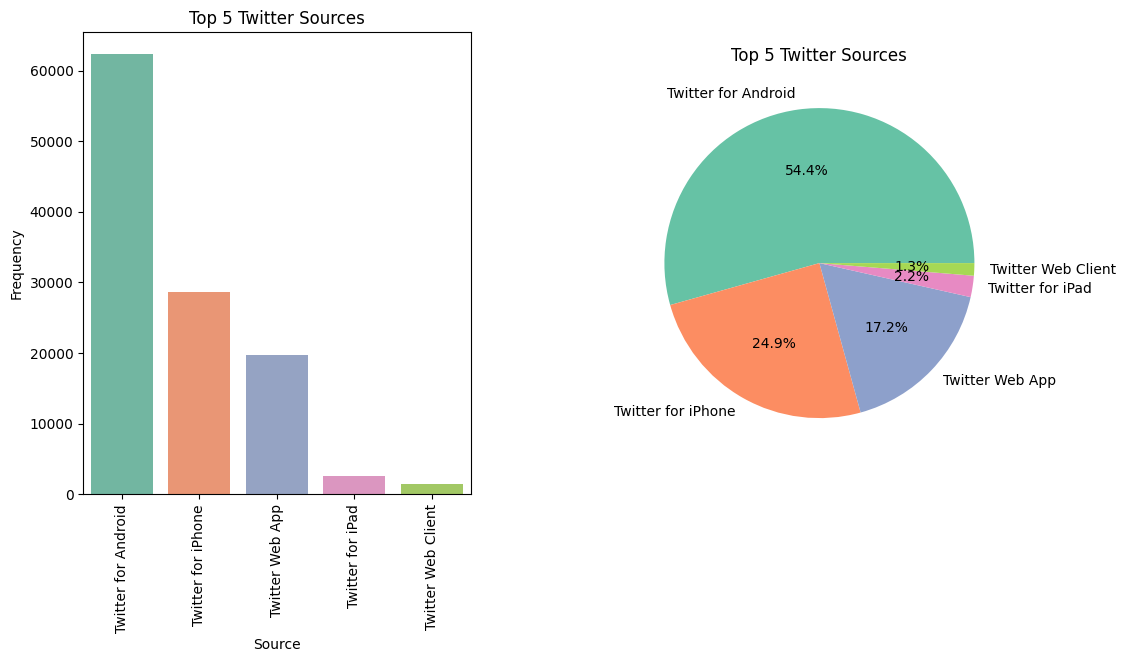

In [23]:
# Get the top 5 domains
top_domains = domains.value_counts().head()

# Define a color palette with the number of colors matching the number of values
num_colors = len(top_domains)
colors = sns.color_palette("Set2", n_colors=num_colors)

# Create a figure with a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar chart on the first subplot
sns.barplot(x=top_domains.index, y=top_domains.values, palette=colors, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Top 5 Twitter Sources")
axes[0].set_xlabel("Source")
axes[0].set_ylabel("Frequency")

# Plot the pie chart on the second subplot
axes[1].pie(
    top_domains.values, labels=top_domains.index, autopct="%1.1f%%", colors=colors
)
axes[1].set_title("Top 5 Twitter Sources")

# Add some space between the subplots
fig.subplots_adjust(wspace=0.4)

plt.show()

### iii) Top Tweets Languages

Number of unique users: 119412
Number of tweets: 120434


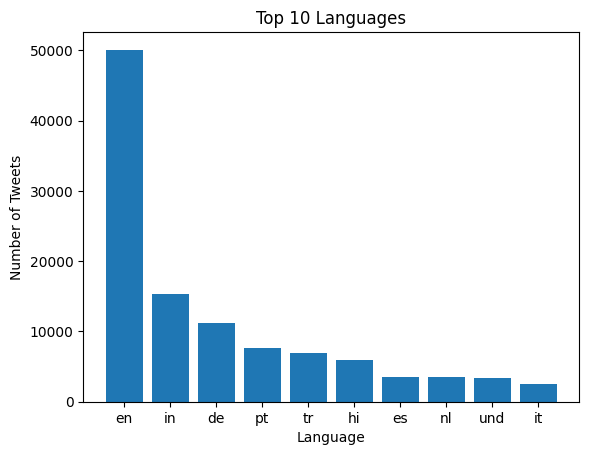

In [24]:
# Convert the user column from dictionaries to strings
twitterdf["user"] = twitterdf["user"].astype(str)

# Print the number of unique users
num_users = len(twitterdf["user"].unique())
print("Number of unique users:", num_users)

# Print the number of tweets
num_tweets = len(twitterdf)
print("Number of tweets:", num_tweets)

# Create a bar chart of the top 10 languages used in the tweets
top_langs = twitterdf["lang"].value_counts().nlargest(10)
plt.bar(top_langs.index, top_langs.values)
plt.title("Top 10 Languages")
plt.xlabel("Language")
plt.ylabel("Number of Tweets")
plt.show()

### iv) Top Tweets Languages

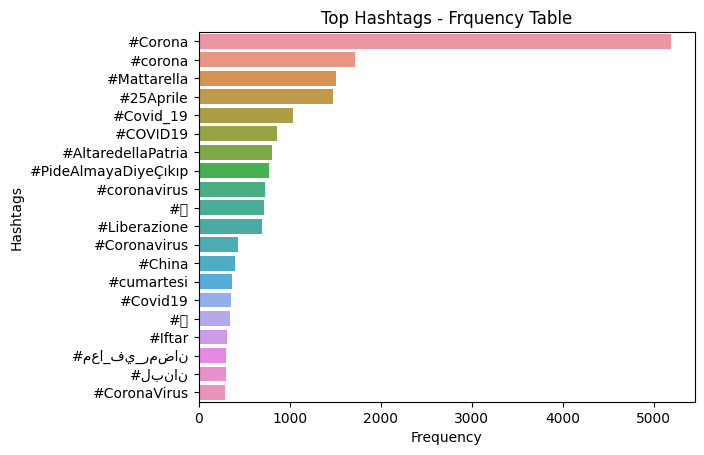

In [25]:
# extract hashtags from text column
hashtags = twitterdf["text"].apply(lambda x: re.findall(r"\#\w+", x))

# create a flat list of hashtags
hashtags_flat = [h for hashtags_list in hashtags for h in hashtags_list]

# count the frequency of each hashtag
hashtags_count = {h: hashtags_flat.count(h) for h in set(hashtags_flat)}

# sort the hashtags by frequency in descending order
hashtags_count_sorted = sorted(hashtags_count.items(), key=lambda x: x[1], reverse=True)

# extract the top 20 hashtags
top_hashtags = dict(hashtags_count_sorted[:20])

# plot the top 20 hashtags
sns.barplot(x=list(top_hashtags.values()), y=list(top_hashtags.keys()))
plt.title("Top Hashtags - Frquency Table")
plt.xlabel("Frequency")
plt.ylabel("Hashtags")
plt.show()

### v) Most Common Tweets Word Cloud

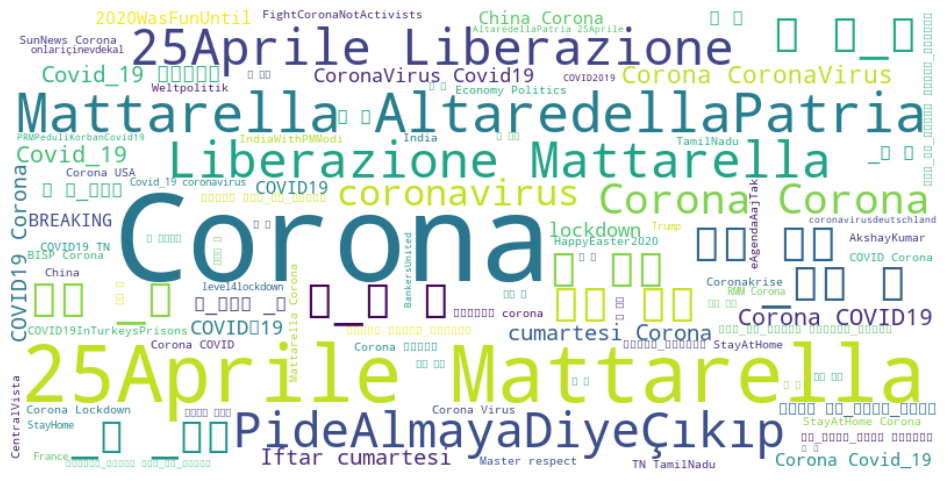

In [26]:
# Convert the 'entities' column into a string of all the hashtags
hashtags = twitterdf["entities"].apply(lambda x: [tag["text"] for tag in x["hashtags"]])
hashtags = " ".join(hashtags.explode().dropna().astype(str).values)

# Create a word cloud of the most common hashtags
wordcloud = WordCloud(
    width=800, height=400, max_words=100, background_color="white"
).generate(hashtags)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### vi) % Tweets marked as Sensitive by Twitter

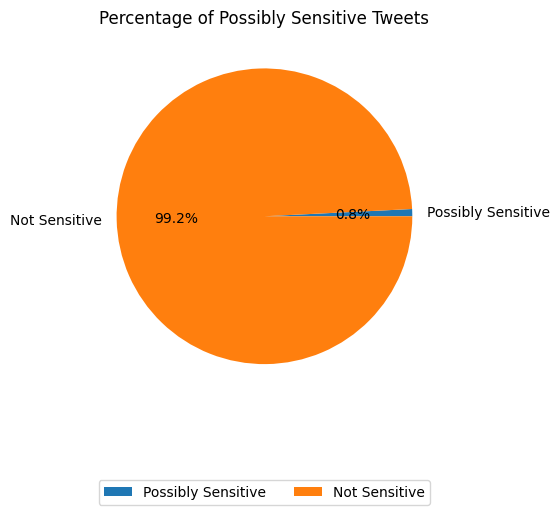

In [27]:
# Count the number of possibly sensitive tweets
num_sensitive = twitterdf["possibly_sensitive"].sum()
num_not_sensitive = len(twitterdf) - num_sensitive

# Calculate the percentage of sensitive and not sensitive tweets
pct_sensitive = num_sensitive / len(twitterdf) * 100
pct_not_sensitive = 100 - pct_sensitive

# Create a pie chart
labels = ["Possibly Sensitive", "Not Sensitive"]
sizes = [pct_sensitive, pct_not_sensitive]
colors = ["#1f77b4", "#ff7f0e"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")

# Add title and legend
plt.title("Percentage of Possibly Sensitive Tweets")
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)

# Show the plot
plt.show()

### vii) Tweets Witheld by countries

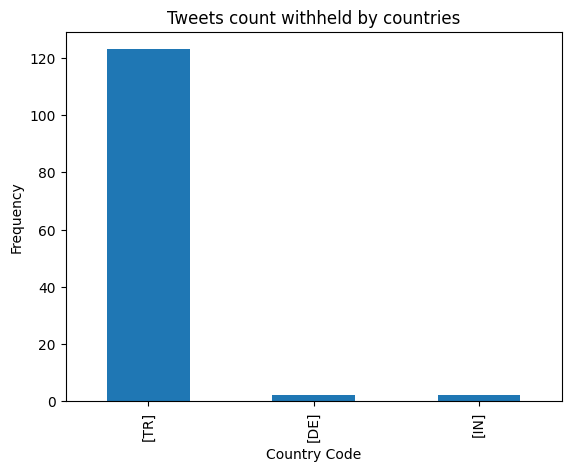

In [28]:
twitterdf["withheld_in_countries"].value_counts().plot.bar()
plt.title("Tweets count withheld by countries")
plt.xlabel("Country Code")
plt.ylabel("Frequency")
plt.show()